In [5]:
!conda update --all --yes
!pip install -q --upgrade pip
!pip install -q tensorflow

Solving environment: - 

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [36]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

K = len(set(y_train))

In [37]:
i = Input(shape=x_train[0].shape)

layer = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
layer = Conv2D(64, (3, 3), strides=2, activation='relu')(layer)
layer = Conv2D(128, (3, 3), strides=2, activation='relu')(layer)

layer = Flatten()(layer)

layer = Dropout(0.2)(layer)
layer = Dense(512, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(K, activation='softmax')(layer)

model = Model(i, layer)

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 292us/sample - loss: 0.5290 - accuracy: 0.8044 - val_loss: 0.4160 - val_accuracy: 0.8389
Epoch 2/15
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3665 - accuracy: 0.8616 - val_loss: 0.3552 - val_accuracy: 0.8664
Epoch 3/15
15648/60000 [======>.......................] - ETA: 11s - loss: 0.3156 - accuracy: 0.8783

KeyboardInterrupt: 

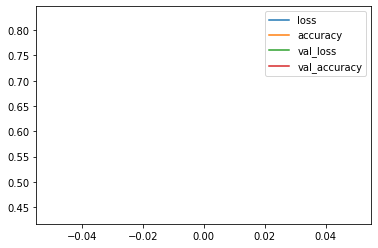

In [34]:
for key, value in r.history.items():
    plt.plot(value, label=key)
plt.legend()